In [2]:
from matplotlib import pyplot as plt, patches, gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

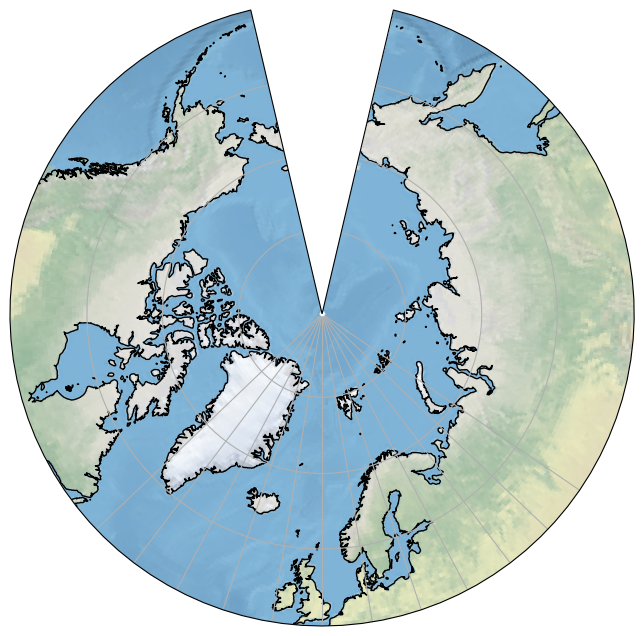

In [45]:
fig = plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=0, central_latitude=39.0, false_easting=0, false_northing=0.0, standard_parallels=(60,75), globe=None, cutoff=50)
)
#ax.set_extent([-60,60,50,80])
ax.coastlines()
ax.stock_img()

#ax.set_xticks([x for x in range(-60,70,10)], crs=ccrs.LambertConformal())
#ax.xaxis.set_major_formatter(LongitudeFormatter())
#ax.set_yticks([y for y in range(50,90,10)], crs=ccrs.LambertConformal())
#ax.yaxis.set_major_formatter(LatitudeFormatter())
gl = ax.gridlines(draw_labels=False, xlocs = [x for x in range(-50,70,10)], \
                  ylocs = [y for y in range(50,90,10)])
gl.top_labels = False
gl.right_labels = False

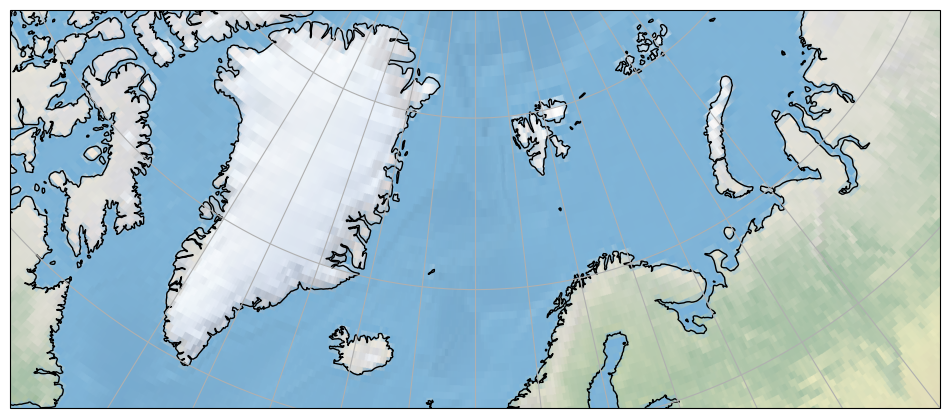

In [44]:
fig = plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=0))
ax.set_extent([-60,60,50,80], crs=ccrs.Geodetic())
ax.coastlines()
ax.stock_img()

#ax.set_xticks([x for x in range(-60,70,10)], crs=ccrs.LambertConformal())
#ax.xaxis.set_major_formatter(LongitudeFormatter())
#ax.set_yticks([y for y in range(50,90,10)], crs=ccrs.LambertConformal())
#ax.yaxis.set_major_formatter(LatitudeFormatter())
gl = ax.gridlines(draw_labels=False, xlocs = [x for x in range(-50,70,10)], \
                  ylocs = [y for y in range(50,90,10)])
#gl.top_labels = False
#gl.right_labels = False

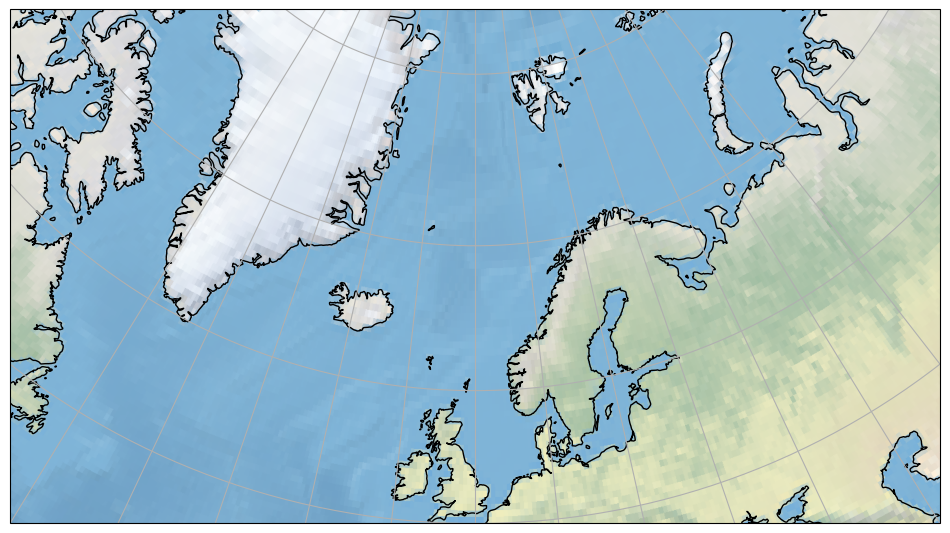

In [24]:
fig = plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=0))
ax.set_extent([-60,60,50,80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

#ax.set_xticks([x for x in range(-60,70,10)], crs=ccrs.LambertConformal())
#ax.xaxis.set_major_formatter(LongitudeFormatter())
#ax.set_yticks([y for y in range(50,90,10)], crs=ccrs.LambertConformal())
#ax.yaxis.set_major_formatter(LatitudeFormatter())
gl = ax.gridlines(draw_labels=False, xlocs = [x for x in range(-50,70,10)], \
                  ylocs = [y for y in range(50,90,10)])
gl.top_labels = False
gl.right_labels = False